<a href="https://colab.research.google.com/github/Hadeer-Youssef/OCR_Practic/blob/main/solution_last_version_task3(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# solution for task3

Task_3: Image detection and extraction. You should detect and extract images in any page and save it in separate image.


#in this  task can  also using yolo for image segmentation and localization
but I made my own algorithm by image processing and computer vision library

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

Enter the bilateralFilter parameter : 11


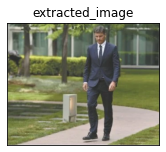

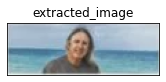

Enter the bilateralFilter parameter : 12


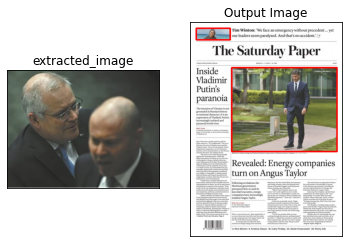

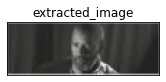

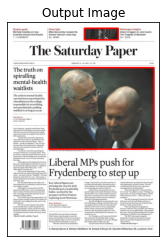

In [ ]:
os.chdir(r"F:\my course of AI for Fatma\Computer Vision Assignment\Computer Vision Assignment\Task3\input")

# List of input image paths
input_image_paths = ["1.jpg", "2.jpg"]  # Add more image paths as needed

# Loop through each input image
for input_image_path in input_image_paths:
    output_folder = f"output_images_{os.path.splitext(os.path.basename(input_image_path))[0]}"

    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Read the input image
    input_image = cv2.imread(input_image_path)

    # Convert the image to grayscale
    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

    # Allow user input for bilateralFilter parameter
    bfilter_param = int(input("Enter the bilateralFilter parameter : "))
    bfilter = cv2.bilateralFilter(gray_image, bfilter_param, 17, 17)  # Noise reduction
    edges = cv2.Canny(bfilter, 30, 200)  # Edge detection

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Loop through each contour
    for i, contour in enumerate(contours):
        # Get the bounding rectangle of the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Filter out small contours based on area
        if w * h > 4000:
            # Extract the ROI (Region of Interest)
            extracted_image = input_image[y:y+h, x:x+w]

            # Save the extracted image
            output_image_path = os.path.join(output_folder, f"image_{i}.jpg")
            cv2.imwrite(output_image_path, extracted_image)
            #plt.imshow(cv2.cvtColor(extracted_image,cv2.COLOR_BGR2RGB))
            plt.subplot(1, 2, 1)
            plt.imshow(cv2.cvtColor(extracted_image,cv2.COLOR_BGR2RGB))
            plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,
                                    labelbottom=False, labeltop=False, labelleft=False, labelright=False)
            plt.title('extracted_image')
            plt.show()

            # Draw a bounding box around the extracted image on the original image
            cv2.rectangle(input_image, (x, y), (x + w, y + h), (0, 0, 255), 3)

    # Save the image with bounding boxes
    output_with_boxes_path = f"output_with_boxes_{os.path.splitext(os.path.basename(input_image_path))[0]}.jpg"
    cv2.imwrite(output_with_boxes_path, input_image)

    # Display the output image with bounding boxes
    #plt.imshow(cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB))
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB))
    plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,
                                    labelbottom=False, labeltop=False, labelleft=False, labelright=False)
    plt.title('Output Image')
    cv2.imshow("Output Image", input_image)
    cv2.waitKey(0)

cv2.destroyAllWindows()